In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train = pd.read_csv('./Data/train_clean.csv') 

In [4]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8


In [5]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [6]:
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [7]:
train.shape[0]

1449

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8


## The Variables

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numerical variables')
print(list(numlist))

34  numerical variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel']


In [10]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

46  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


# II. Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [11]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist.remove('SalePrice')
numlist.remove('Id')

print(len(numlist),' numerical variables')
print(numlist)

32  numerical variables
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel']


In [12]:
#numlist = ['OverallQual','GrLivArea',
#           'TotalBsmtSF','FullBath',
#           'GarageCars','AgeHome',
#           'YrsSinceRemodel'] # testing

In [13]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    if aov_table['PR(>F)'][0] <= 0.01:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  46  categorical variables
Reduced list has  39  categorical variables 

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [14]:
#catlist = ['ExterQual', 'BsmtQual', 'KitchenQual',
#          'Neighborhood', 'MSZoning','BsmtCond',
#          'CentralAir','PoolQC'] # testing

In [15]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist 
print(inputs_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel']


In [16]:
PriceFeatures = train[inputs_vars].copy()

In [17]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHome,YrsSinceRemodel
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,5,5
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,31,31
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,7,6
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,91,36
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,8,8


##### Which Columns Are Numeric? Need this information later.

In [18]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


##### The Dependent Variable 🎯

In [19]:
Price = train['SalePrice']

In [20]:
log_Price = np.log(train['SalePrice'])

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


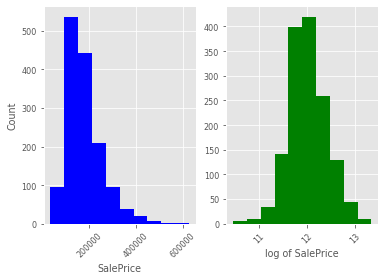

In [21]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Label Encode the Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#for cvar in catlist:   
#    PriceFeatures[cvar]= label_encoder.fit_transform(PriceFeatures[cvar]) 

In [23]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHome,YrsSinceRemodel
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,5,5
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,31,31
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,7,6
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,91,36
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,8,8


#### 3. Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [25]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHome,YrsSinceRemodel
476,105.0,13693,9,5,772.0,0,0,2153,2153,2069,574,0,2643,0,0,2,1,3,1,9,1,3,694,414,84,0,0,0,0,0,1,1
528,85.0,10200,6,5,219.0,783,0,678,1461,1509,0,0,1509,1,0,2,0,3,1,5,1,2,600,224,0,0,0,0,0,0,20,19
186,0.0,9947,7,5,0.0,611,0,577,1188,1217,0,0,1217,1,0,2,0,3,1,6,0,2,497,168,27,0,0,0,0,0,19,18
156,60.0,7200,5,7,0.0,0,0,0,0,1040,0,0,1040,0,0,1,0,2,1,5,0,2,625,0,0,0,0,0,0,0,56,56
312,65.0,7800,5,7,0.0,507,0,286,793,793,325,0,1118,1,0,1,0,3,1,5,1,2,410,0,0,0,0,271,0,0,67,56


#### 4. Standardize the numerical variables

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [27]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [28]:
X_train_scaled.shape

(1159, 32)

<ipython-input-29-3f0e3c5f6e20>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


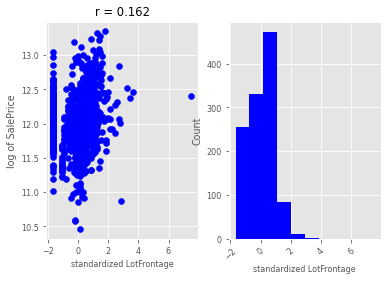

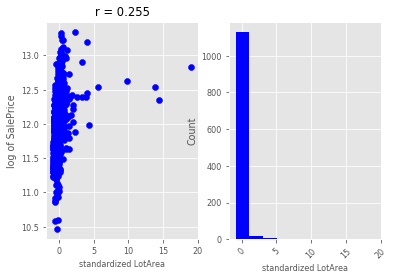

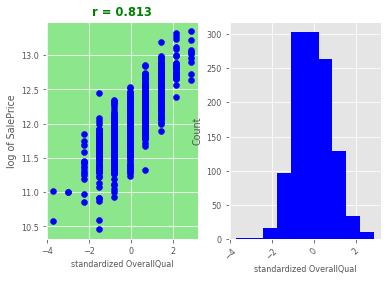

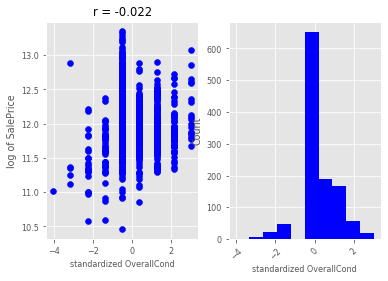

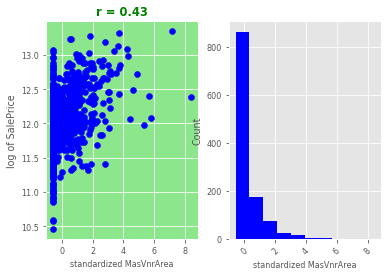

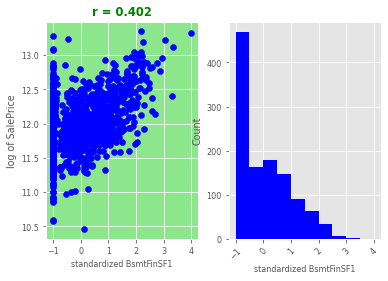

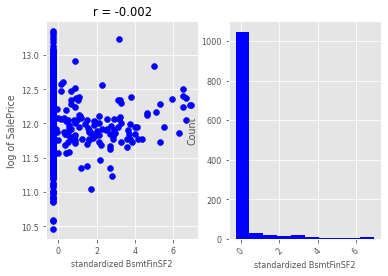

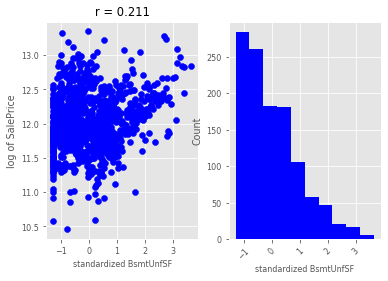

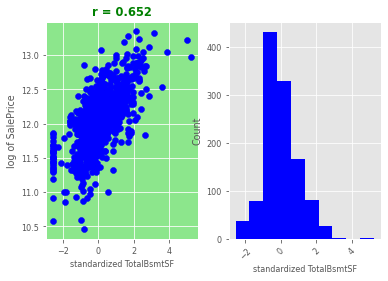

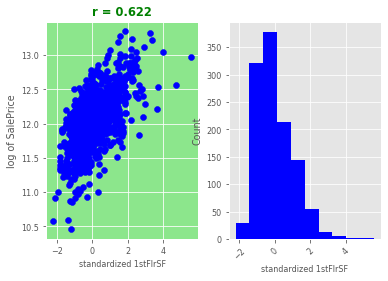

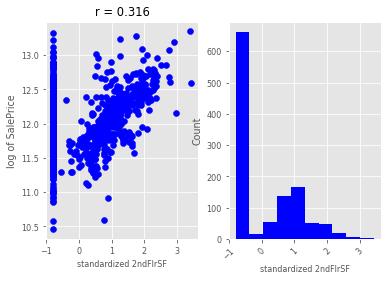

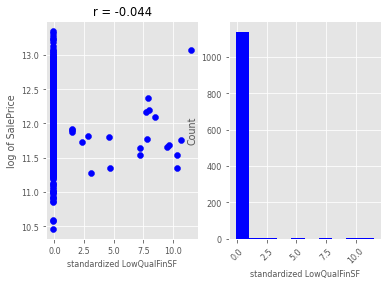

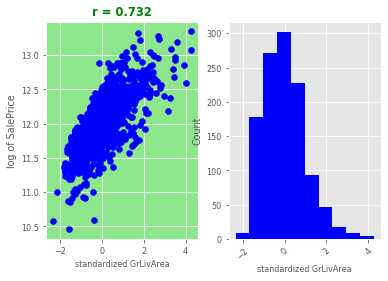

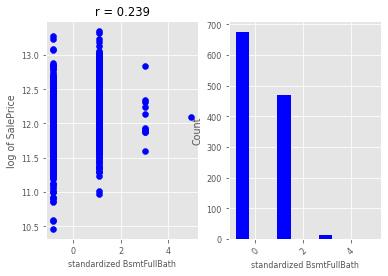

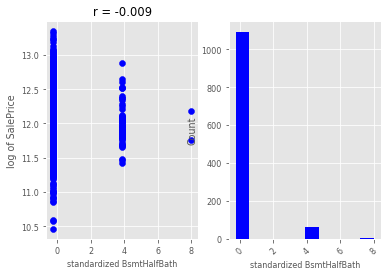

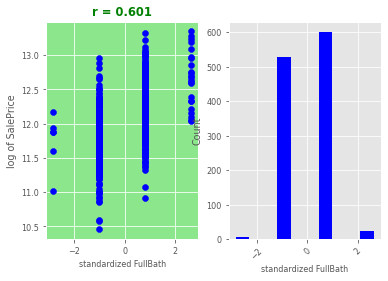

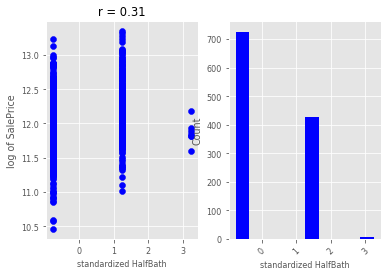

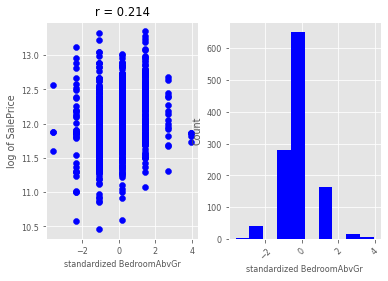

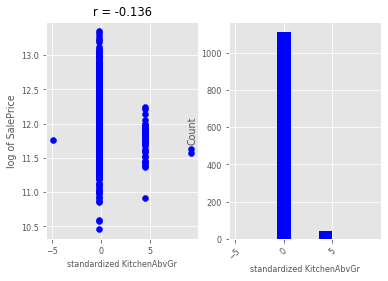

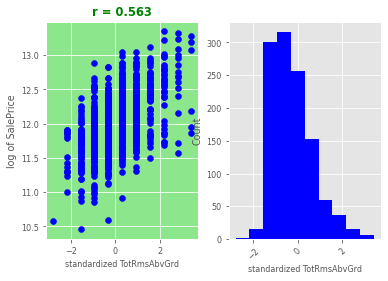

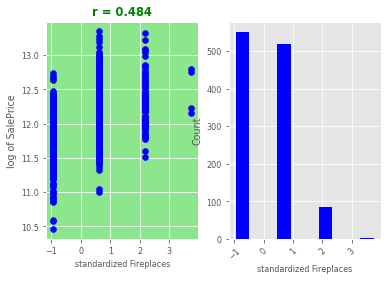

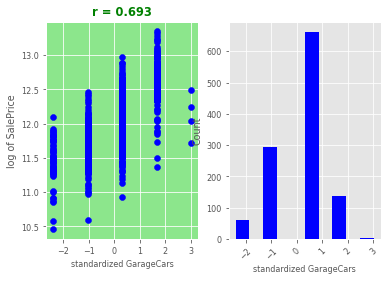

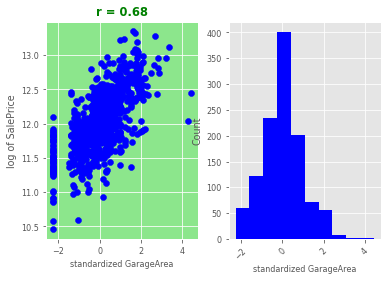

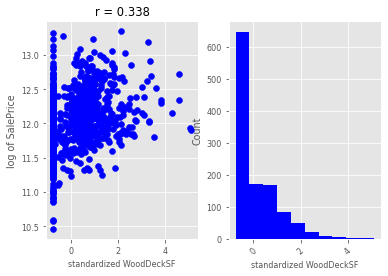

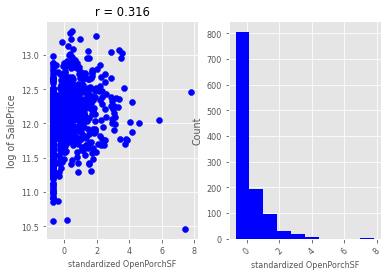

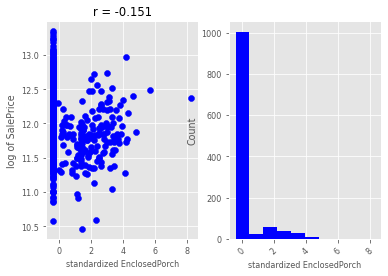

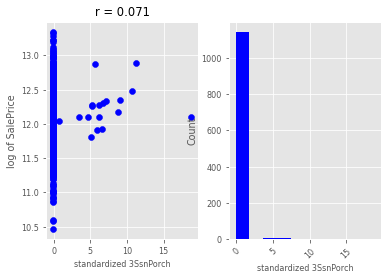

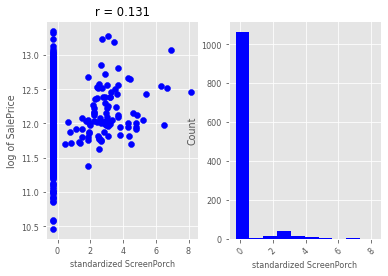

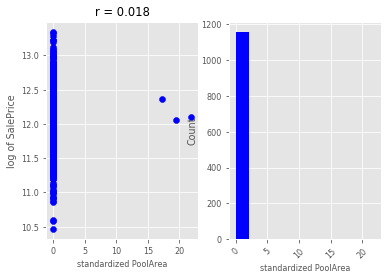

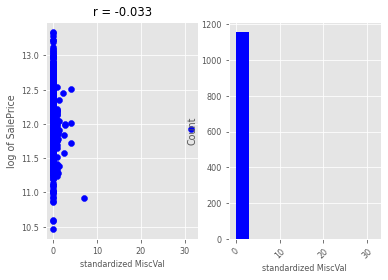

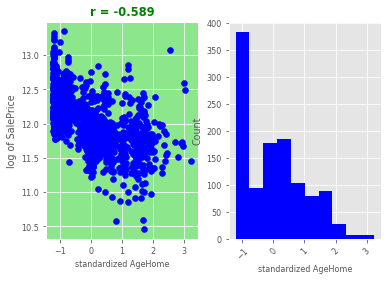

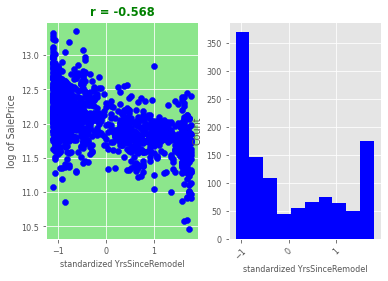

In [29]:
# plotting the standardized numerical variables vs.
     # log of SalePrice
    
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in X_train.columns[num_indx]:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

In [31]:
# initializing these variables for model comparision
model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_train = []
rmse_test = []

# III. Train Models

## Model 3A : Random Forests - No Grid Search 

In [32]:
X_train_scaled.shape

(1159, 32)

In [33]:
np.sqrt(X_train_scaled.shape[1])

5.656854249492381

In [34]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
randomForest.get_params()

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
randomForest.set_params(random_state=42, 
                        n_estimators=100, 
                        max_features=5,
                        min_samples_split = 10)
randomForest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=5, min_samples_split=10, random_state=42)

In [36]:
randomForest.score(X_train_scaled, y_train)

0.9495169893596507

In [37]:
randomForest.score(X_test_scaled, y_test)

0.8804572129278975

In [38]:
sorted_importance = sorted(zip(PriceFeatures, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.1475517605878807),
 ('GrLivArea', 0.13699888570399926),
 ('AgeHome', 0.09140546390891123),
 ('GarageCars', 0.08915326139403197),
 ('TotalBsmtSF', 0.07523186603494618),
 ('1stFlrSF', 0.07184643226052408),
 ('GarageArea', 0.06929536480416917),
 ('FullBath', 0.045340865234688804),
 ('YrsSinceRemodel', 0.04332350902444194),
 ('LotArea', 0.03332160757479117),
 ('2ndFlrSF', 0.025036467131479063),
 ('BsmtFinSF1', 0.02430149427408203),
 ('TotRmsAbvGrd', 0.023128858564967714),
 ('OpenPorchSF', 0.020714786158291157),
 ('OverallCond', 0.016444612830779203),
 ('MasVnrArea', 0.01452584571156942),
 ('Fireplaces', 0.01419215679496049),
 ('BsmtUnfSF', 0.010298603553425417),
 ('LotFrontage', 0.009173817629464806),
 ('BedroomAbvGr', 0.007876285439005551),
 ('HalfBath', 0.007653254922056759),
 ('WoodDeckSF', 0.006924359468022101),
 ('KitchenAbvGr', 0.0036625036953174517),
 ('EnclosedPorch', 0.003354931630944581),
 ('BsmtFullBath', 0.0031689384622515704),
 ('BsmtFinSF2', 0.0019311374965

RMSE Logarithmic Train:  0.08983583127816892
RMSE Logarithmic Test:  0.13212089467867952
RMSE Train: $ 18077.96246997454
RMSE Test: $ 23623.70924372235


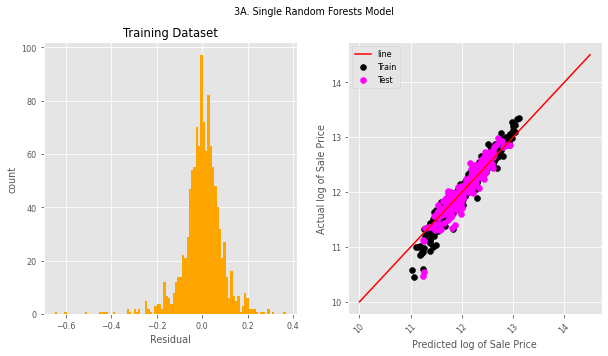

In [39]:
from sklearn.metrics import mean_squared_error
rmse_srf_train = mean_squared_error(y_train, 
            randomForest.predict(X_train_scaled), 
            squared = False)
rmse_srf_test = mean_squared_error(y_test, 
            randomForest.predict(X_test_scaled), 
            squared = False)

print('RMSE Logarithmic Train: ', rmse_srf_train)
print('RMSE Logarithmic Test: ', rmse_srf_test)

rmse_srf_train_conv = mean_squared_error(np.exp(y_train), 
            np.exp(randomForest.predict(X_train_scaled)), 
            squared = False)
rmse_srf_test_conv = mean_squared_error(np.exp(y_test), 
            np.exp(randomForest.predict(X_test_scaled)), 
            squared = False)
print('RMSE Train: $', rmse_srf_train_conv)
print('RMSE Test: $', rmse_srf_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_srf_train = y_train - randomForest.predict(X_train_scaled)
residuals_srf_test = y_test - randomForest.predict(X_test_scaled)

axs[0].hist(residuals_srf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3A. Single Random Forests Model');

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

r2_log_train_temp = r2_score(y_train, 
                 randomForest.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                randomForest.predict(X_test_scaled))
rmse_log_train_temp = rmse_srf_train
rmse_log_test_temp = rmse_srf_test
rmse_train_temp = rmse_srf_train_conv
rmse_test_temp = rmse_srf_test_conv

model_descrp.append('Single RF')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 3B : Random Forests - Grid Search 

In [41]:
X_train_scaled.shape[1]

32

In [42]:
np.sqrt(X_train_scaled.shape[1])

5.656854249492381

In [43]:
# sklearn.metrics.SCORERS.keys()

In [44]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skfold = KFold(n_splits=3, shuffle=True, random_state=0)
gs_randomForest = ensemble.RandomForestRegressor()

grid_para_forest = [{
    "n_estimators": [500, 1000, 2000],
    "max_features": [4, 5, 6, 8],
    "min_samples_split":[2, 4, 6, 8, 10],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(gs_randomForest, 
                                  grid_para_forest, 
                                  scoring='r2', 
                                  cv = skfold,
                                  n_jobs=-1)
%time grid_search_forest.fit(X_train_scaled, y_train)

CPU times: user 5.31 s, sys: 349 ms, total: 5.66 s
Wall time: 1min 14s


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [4, 5, 6, 8],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'n_estimators': [500, 1000, 2000],
                          'random_state': [42]}],
             scoring='r2')

In [45]:
# best parameters
grid_search_forest.best_params_

{'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 2000,
 'random_state': 42}

In [46]:
model = grid_search_forest.best_estimator_

In [47]:
mean_squared_error(y_train, 
    model.predict(X_train_scaled), 
    squared = False)

0.051436873861814135

In [48]:
## best score
grid_search_forest.best_score_

0.8706448266760946

RMSE Logarithmic Train:  0.051436873861814135
RMSE Logarithmic Test:  0.12769721514235988
RMSE Train: $ 10425.975456099864
RMSE Test: $ 22242.522948660986


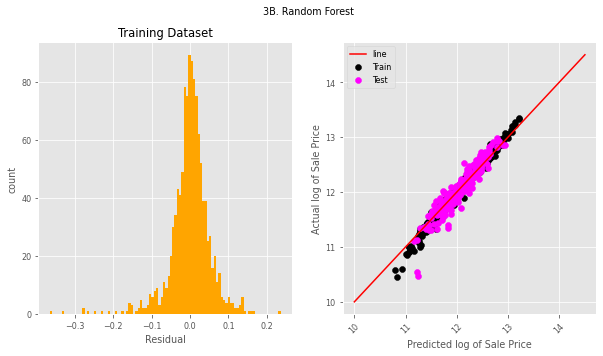

In [49]:
from sklearn.metrics import mean_squared_error
rmse_rf_train = mean_squared_error(y_train, 
    grid_search_forest.best_estimator_.predict(X_train_scaled), 
    squared = False)
rmse_rf_test = mean_squared_error(y_test, 
    grid_search_forest.best_estimator_.predict(X_test_scaled), 
    squared = False)

print('RMSE Logarithmic Train: ', rmse_rf_train)
print('RMSE Logarithmic Test: ', rmse_rf_test)

rmse_rf_train_conv = mean_squared_error(np.exp(y_train), 
    np.exp(grid_search_forest.best_estimator_.predict(X_train_scaled)), 
    squared = False)
rmse_rf_test_conv = mean_squared_error(np.exp(y_test), 
    np.exp(grid_search_forest.best_estimator_.predict(X_test_scaled)), 
    squared = False)

print('RMSE Train: $', rmse_rf_train_conv)
print('RMSE Test: $', rmse_rf_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_rf_train = y_train - grid_search_forest.best_estimator_.predict(X_train_scaled)
residuals_rf_test = y_test - grid_search_forest.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_rf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3B. Random Forest');

In [50]:
r2_score(y_train, 
        grid_search_forest.best_estimator_.predict(X_train_scaled))

0.9834501067377893

In [51]:
r2_score(y_test, 
        grid_search_forest.best_estimator_.predict(X_test_scaled))

0.8883282768969969

In [52]:
r2_log_train_temp = r2_score(y_train, 
        grid_search_forest.best_estimator_.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
        grid_search_forest.best_estimator_.predict(X_test_scaled))
rmse_log_train_temp = rmse_rf_train
rmse_log_test_temp = rmse_rf_test
rmse_train_temp = rmse_rf_train_conv
rmse_test_temp = rmse_rf_test_conv

model_descrp.append('gs RF')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 4A : Gradient Boosting - No Grid Search

In [53]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [54]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
gbm.get_params()

Parameters currently in use:



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
gbm.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [56]:
gbm.score(X_train_scaled, y_train)

0.9518058475875438

In [57]:
gbm.feature_importances_.sum()

1.0

In [58]:
sorted_importance = sorted(zip(PriceFeatures, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4552695734035394),
 ('GrLivArea', 0.17213249284941545),
 ('TotalBsmtSF', 0.06516603946536884),
 ('AgeHome', 0.06234446027927867),
 ('GarageCars', 0.04737757702117565),
 ('BsmtFinSF1', 0.032517181446453304),
 ('GarageArea', 0.030078658854364757),
 ('YrsSinceRemodel', 0.029127070901225967),
 ('OverallCond', 0.024406292164156244),
 ('LotArea', 0.021477707047649577),
 ('1stFlrSF', 0.015164980356366617),
 ('Fireplaces', 0.010641073878403129),
 ('FullBath', 0.005659853032086429),
 ('OpenPorchSF', 0.005306988322348296),
 ('WoodDeckSF', 0.0036927940006529635),
 ('2ndFlrSF', 0.0027236565174168846),
 ('BsmtFullBath', 0.0027090600659671377),
 ('TotRmsAbvGrd', 0.002542158223687077),
 ('ScreenPorch', 0.0024968937258938494),
 ('HalfBath', 0.002206226166783985),
 ('KitchenAbvGr', 0.0021294653096900493),
 ('BsmtUnfSF', 0.0014245154837207688),
 ('BsmtFinSF2', 0.001133495969165219),
 ('LotFrontage', 0.0007364930822417389),
 ('EnclosedPorch', 0.0005046325198349254),
 ('MasVnrArea', 0.0

RMSE Logarithmic Train:  0.08777566749146848
RMSE Logarithmic Test:  0.1240640681995994
RMSE Train: $ 15888.526596628726
RMSE Test: $ 20936.09801565103


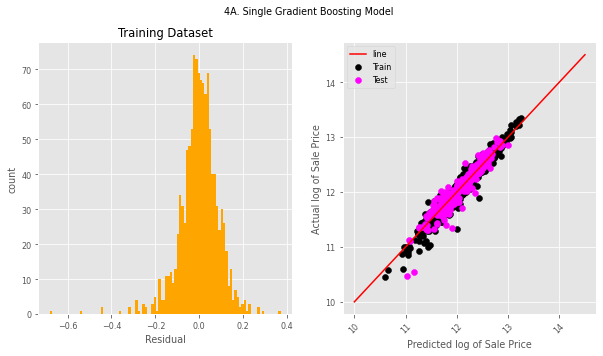

In [60]:
from sklearn.metrics import mean_squared_error
rmse_sgbm_train = mean_squared_error(y_train, 
                gbm.predict(X_train_scaled), 
                squared = False)
rmse_sgbm_test = mean_squared_error(y_test, 
                gbm.predict(X_test_scaled), 
                squared = False)

print('RMSE Logarithmic Train: ', rmse_sgbm_train)
print('RMSE Logarithmic Test: ', rmse_sgbm_test)

rmse_sgbm_train_conv = mean_squared_error(np.exp(y_train), 
                np.exp(gbm.predict(X_train_scaled)), 
                squared = False)
rmse_sgbm_test_conv = mean_squared_error(np.exp(y_test), 
                np.exp(gbm.predict(X_test_scaled)), 
                squared = False)
print('RMSE Train: $', rmse_sgbm_train_conv)
print('RMSE Test: $', rmse_sgbm_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_sgbm_train = y_train - gbm.predict(X_train_scaled)
residuals_sgbm_test = y_test - gbm.predict(X_test_scaled)
axs[0].hist(residuals_sgbm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gbm.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('4A. Single Gradient Boosting Model');

In [61]:
r2_log_train_temp = r2_score(y_train, 
                gbm.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                gbm.predict(X_test_scaled))
rmse_log_train_temp = rmse_sgbm_train
rmse_log_test_temp = rmse_sgbm_test
rmse_train_temp = rmse_sgbm_train_conv
rmse_test_temp = rmse_sgbm_test_conv

model_descrp.append('single gbm')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 4B : Gradient Boosting - with Grid Search

In [62]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
skfold = KFold(n_splits=3, shuffle=True, random_state=0)
gs_gbm = GradientBoostingRegressor()

grid_for_gbm = [{
    "learning_rate": [0.001, 0.005, 0.01],
    "n_estimators": [500, 1000, 2000],
    "max_features": [4, 5, 6, 8],
    "min_samples_split":[2, 4, 6, 8, 10],
    "random_state": [42]}]
grid_search_gbm = GridSearchCV(gs_gbm, 
                                grid_for_gbm, 
                                scoring='r2', 
                                cv = skfold,
                                n_jobs=-1)
%time grid_search_gbm.fit(X_train_scaled, y_train)

CPU times: user 2.31 s, sys: 185 ms, total: 2.5 s
Wall time: 56.6 s


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.001, 0.005, 0.01],
                          'max_features': [4, 5, 6, 8],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'n_estimators': [500, 1000, 2000],
                          'random_state': [42]}],
             scoring='r2')

In [64]:
grid_search_gbm.best_params_

{'learning_rate': 0.01,
 'max_features': 6,
 'min_samples_split': 4,
 'n_estimators': 2000,
 'random_state': 42}

In [65]:
grid_search_gbm.best_score_

0.8984003193855954

RMSE Logarithmic Train:  0.07691729229069302
RMSE Logarithmic Test:  0.11682711473389243
RMSE Train: $ 13201.913607519411
RMSE Test: $ 20371.87357252095


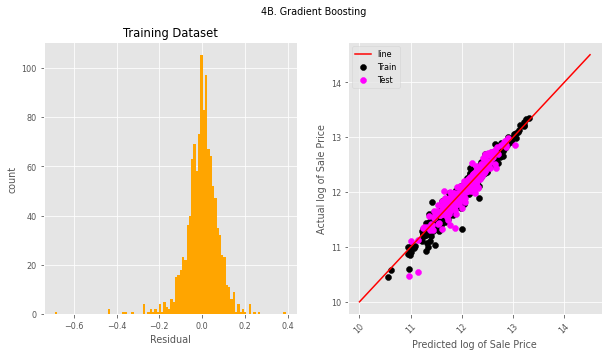

In [68]:
from sklearn.metrics import mean_squared_error
rmse_gbm_train = mean_squared_error(y_train, 
    grid_search_gbm.best_estimator_.predict(X_train_scaled), 
    squared = False)
rmse_gbm_test = mean_squared_error(y_test, 
    grid_search_gbm.best_estimator_.predict(X_test_scaled), 
    squared = False)

print('RMSE Logarithmic Train: ', rmse_gbm_train)
print('RMSE Logarithmic Test: ', rmse_gbm_test)

rmse_gbm_train_conv = mean_squared_error(np.exp(y_train), 
    np.exp(grid_search_gbm.best_estimator_.predict(X_train_scaled)), 
    squared = False)
rmse_gbm_test_conv = mean_squared_error(np.exp(y_test), 
    np.exp(grid_search_gbm.best_estimator_.predict(X_test_scaled)), 
    squared = False)
print('RMSE Train: $', rmse_gbm_train_conv)
print('RMSE Test: $', rmse_gbm_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_gbm_train = y_train - grid_search_gbm.best_estimator_.predict(X_train_scaled)
residuals_gbm_test = y_test - grid_search_gbm.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_gbm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(grid_search_gbm.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(grid_search_gbm.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('4B. Gradient Boosting');

In [69]:
r2_log_train_temp = r2_score(y_train, 
                grid_search_gbm.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                grid_search_gbm.predict(X_test_scaled))
rmse_log_train_temp = rmse_gbm_train
rmse_log_test_temp = rmse_gbm_test
rmse_train_temp = rmse_gbm_train_conv
rmse_test_temp = rmse_gbm_test_conv

model_descrp.append('gbm')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

# IV. Compare Model Results

In [70]:
pd.options.display.float_format = '{:,.2f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test, 
                 rmse_train, rmse_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test',
                                       'r2 train',
                                       'r2 test'])

#results.head(10)
results_sorted = results.sort_values('rmse log train', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse train,rmse test,r2 train,r2 test
1,gs RF,0.05,0.13,"10,425.98","22,242.52",0.98,0.89
3,gbm,0.08,0.12,"13,201.91","20,371.87",0.96,0.91
2,single gbm,0.09,0.12,"15,888.53","20,936.10",0.95,0.89
0,Single RF,0.09,0.13,"18,077.96","23,623.71",0.95,0.88


In [ ]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[0].scatter(lm.predict(X_train_scaled), 
         y_train, color='red')
axs[0].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='orange')
axs[0].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='green')
axs[0].scatter(gbm.predict(X_train_scaled), 
         y_train, color='blue')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','lm','ls','rf','gbm'])
axs[0].set_title('Training Dataset')

axs[1].plot(x,y, 'k-')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='red')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='orange')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='green')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='blue')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','ls','rf','gbm'])
axs[1].set_title('Test Dataset')

fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig2, axs2 = plt.subplots(4,2) 
fig2.set_figheight(8)
fig2.set_figwidth(10)

axs2[0,0].hist(residuals_lm_train,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,0].set_xlim(-1.75,0.75)
axs2[0,0].set_ylim(0,150)
axs2[1,0].hist(residuals_ls_train,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,0].set_xlim(-1.75,0.75)
axs2[1,0].set_ylim(0,150)
axs2[2,0].hist(residuals_srf_train,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,0].set_xlim(-1.75,0.75)
axs2[2,0].set_ylim(0,150)
axs2[3,0].hist(residuals_gbm_train,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,0].set_xlim(-1.75,0.75)
axs2[3,0].set_ylim(0,150)

axs2[0,1].hist(residuals_lm_test,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,1].set_xlim(-1.75,0.75)
axs2[0,1].set_ylim(0,150)
axs2[1,1].hist(residuals_ls_test,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,1].set_xlim(-1.75,0.75)
axs2[1,1].set_ylim(0,150)
axs2[2,1].hist(residuals_srf_test,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,1].set_xlim(-1.75,0.75)
axs2[2,1].set_ylim(0,150)
axs2[3,1].hist(residuals_gbm_test,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,1].set_xlim(-1.75,0.75)
axs2[3,1].set_ylim(0,150)
#axs2[0].legend(['lm','ls','rf','gbm'])
#axs2[0].set_ylabel('count')
#axs2[0].set_xlabel('Residual')
#axs2[0].set_title('Training Dataset - Residuals')